# R tree 

Los R-trees (R-árboles) es una estructura de datos pensada para la busqueda de estos partiendo el espacio, estas estructura se adapta a los datos sobre los cuales se desea tener un cierto orden jerárquico usando su bounding box y formando bounding box internos. Existen distintas variantes de los R-trees los cuales se utilizan dependiendo del uso especico de los datos.  

Al igual que los Quadtrees los R-trees son árboles, y la diferencia radica que los nodos representan el mínimio bounding box (cuadro delimitador) de los datos (puntos o polygonos). De esta forma los nodos son representaciones de ciertas regiones del espacio donde se encuentran los datos. Esta diferencia genera que los rectángulos, que son representados por los nodos, sean  flexibles tanto en el número de hijos de la gráfica como en el tamaño de los rectángulos. A diferencia de los Quadtrees donde las regiones de cada uno de los nodos en cada nivel son del mismo tamaño. 

El algoritmo subdivide el espacio de forma iterativa la intencion de que cada subdivisión contenga la misma cantidad de puntos (polygonos, etc ). Esta divición  

In [40]:
import random
import numpy as np
import shapely
from shapely.geometry import Point, LineString
from matplotlib import pyplot as plt
import anytree
from IPython.display import IFrame
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
import osmnx as ox
import pandas as pd
import geopandas as gpd
ox.config(use_cache=True, log_console=False)
from descartes import PolygonPatch
from sklearn.datasets import make_blobs

In [2]:
class Node_R():
    def __init__(self, x0, y0, ancho, altura, puntos):
        self.Point_inferior = shapely.geometry.Point(x0,y0)
        self.altura  = ancho
        self.ancho   = altura
        self.rectangulo = shapely.geometry.Polygon([Point(x0,y0),Point(x0+ancho,y0),Point(x0+ancho,y0+altura),Point(x0,y0+altura), Point(x0,y0)]  ) 
        self.puntos  = puntos 
        self.children = []
    
    def get_ancho(self):
        return self.ancho
    
    def get_altura(self):
        return self.altura
    
    def get_puntos(self):
        return self.puntos
    
    def get_Punto_inferior(self):
        return self.Point_inferior
    
    def get_polygon(self):
        return self.polygon
    

In [3]:
def dividir(nodo, k):    
    if len(nodo.puntos)<=k:
        return
    x_vals = [punto.x for punto in  nodo.puntos]
    y_vals = [punto.y for punto in  nodo.puntos]
    
    x_qua= np.quantile(x_vals, [0.333333333, 0.666666])
    y_qua= np.quantile(y_vals, .5 )
    
    arr_0 = [ point for point in nodo.puntos if point.x < x_qua[0]  and point.y < y_qua]
    arr_1 = [ point for point in nodo.puntos if point.x < x_qua[0]  and point.y >= y_qua]
    arr_2 = [ point for point in nodo.puntos if point.x >= x_qua[0] and 
             point.x < x_qua[1]  and point.y < y_qua]
    arr_3 = [ point for point in nodo.puntos if point.x >= x_qua[0] and 
             point.x < x_qua[1]  and point.y >= y_qua]
    arr_4 = [ point for point in nodo.puntos if point.x > x_qua[1]  and point.y < y_qua]
    arr_5 = [ point for point in nodo.puntos if point.x > x_qua[1]  and point.y >= y_qua]
    
    
    
    min_point_0 = Point(min([point.x for point in arr_0]), min([point.y for point in arr_0]))
    altura_0 = max([point.y for point in arr_0]) - min_point_0.y 
    ancho_0 = max([point.x for point in arr_0]) - min_point_0.x
    N_0 = Node_R(min_point_0.x, min_point_0.y,  ancho= ancho_0, altura= altura_0, puntos=arr_0)
    dividir(N_0, k)
    
    min_point_1 = Point(min([point.x for point in arr_1]), min([point.y for point in arr_1]))
    altura_1 = max([point.y for point in arr_1]) - min_point_1.y 
    ancho_1 = max([point.x for point in arr_1]) - min_point_1.x
    N_1 = Node_R(min_point_1.x, min_point_1.y,  ancho= ancho_1, altura= altura_1, puntos=arr_1)
    dividir(N_1, k)
     
    min_point_2 = Point(min([point.x for point in arr_2]), min([point.y for point in arr_2]))
    altura_2 = max([point.y for point in arr_2]) - min_point_2.y 
    ancho_2 = max([point.x for point in arr_2]) - min_point_2.x
    N_2 = Node_R(min_point_2.x, min_point_2.y,  ancho= ancho_2, altura= altura_2, puntos=arr_2)
    dividir(N_2, k)
    
    min_point_3 = Point(min([point.x for point in arr_3]), min([point.y for point in arr_3]))
    altura_3 = max([point.y for point in arr_3]) - min_point_3.y 
    ancho_3 = max([point.x for point in arr_3]) - min_point_3.x
    N_3 = Node_R(min_point_3.x, min_point_3.y,  ancho= ancho_3, altura= altura_3, puntos=arr_3)
    dividir(N_3, k)
    
    min_point_4 = Point(min([point.x for point in arr_4]), min([point.y for point in arr_4]))
    altura_4 = max([point.y for point in arr_4]) - min_point_4.y 
    ancho_4 = max([point.x for point in arr_4]) - min_point_4.x
    N_4 = Node_R(min_point_4.x, min_point_4.y,  ancho= ancho_4, altura= altura_4, puntos=arr_4)
    dividir(N_4, k)
    
    min_point_5 = Point(min([point.x for point in arr_5]), min([point.y for point in arr_5]))
    altura_5 = max([point.y for point in arr_5]) - min_point_5.y 
    ancho_5 = max([point.x for point in arr_5]) - min_point_5.x
    N_5 = Node_R(min_point_5.x, min_point_5.y,  ancho= ancho_5, altura= altura_5, puntos=arr_5)
    dividir(N_5, k)
    

    nodo.children = [N_0, N_1, N_2, N_3, N_4, N_5]
   
   
def contiene(nodo ,  puntos_c):
    contenidos =[]
    for punto in puntos_c:
        if nodo.polygon.contains(punto):
            contenidos.append(punto)
    return contenidos


def todos(nodo):
    if not nodo.children:
        return [nodo]
    else:
        children = [nodo]
        for child in nodo.children:
            children += (todos(child))
    return children

In [67]:
class RTree():
    def __init__(self, k, n):
        self.threshold = k
        self.Puntos = [shapely.geometry.Point(random.uniform(0, 1), random.uniform(0, 1)) for x in range(n)]
        self.root = Node_R(x0=0, y0= 0, altura = 1, ancho= 1, puntos=self.Puntos)
    
    def sobre_puntos(self, k, points):
        self.threshold = k
        self.Puntos = points
        x_points =[point.x for point in self.Puntos]
        y_points =[point.y for point in self.Puntos]
        x_0= min(x_points) 
        ancho_0 = max(x_points) - x_0 
        y_0= min(y_points) 
        altura_0 = max(y_points) - y_0 
        self.root = Node_R(x0=x_0, y0= y_0, altura = altura_0, ancho= ancho_0, puntos=self.Puntos)
    
    def add_punto(self, x, y):
        self.Puntos.append(Point(x, y))
    
    def get_puntos(self):
        return self.Puntos
    
    def subdivide(self):
        dividir(self.root, self.threshold)
    
    def imprime(self):
        fig, axs = plt.subplots(figsize=(12, 8))
        axs.set_title("R-tree")
        c = todos(self.root)
        print ("Numero de nodos: " ,len(c))
        areas = set()
        for el in c:
            areas.add(el.ancho*el.altura)
        print("Area mínima de un nodo: " ,min(areas))
        for n in c:
            pol_x, pol_y = n.rectangulo.exterior.xy
            axs.plot(pol_x, pol_y)
        x = [point.x for point in self.Puntos]
        y = [point.y for point in self.Puntos]
        plt.plot(x, y, 'ro')
        plt.show()
        return

In [68]:
puntos_random= [shapely.geometry.Point(random.uniform(0, 1), random.uniform(0, 1)) for x in range(400)]

In [69]:
R1 = RTree(20, 200)


Numero de nodos:  1
Area mínima de un nodo:  1


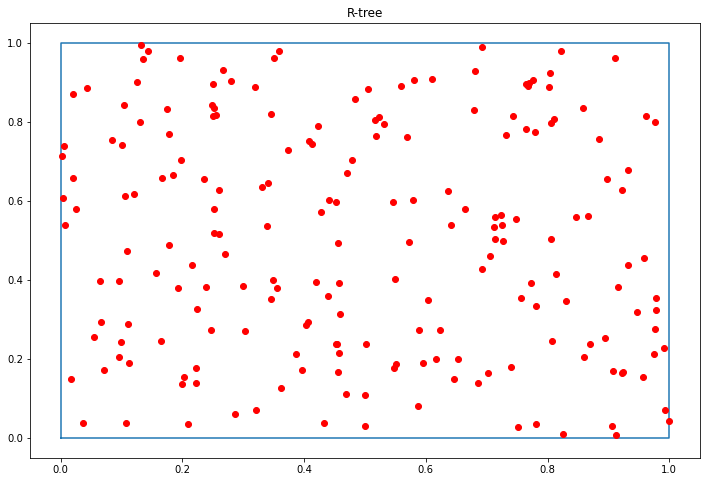

In [70]:
R1.imprime()

In [71]:
R1.sobre_puntos(20,points =puntos_random)

In [72]:
len(R1.Puntos)

400

Numero de nodos:  1
Area mínima de un nodo:  0.9916922295481454


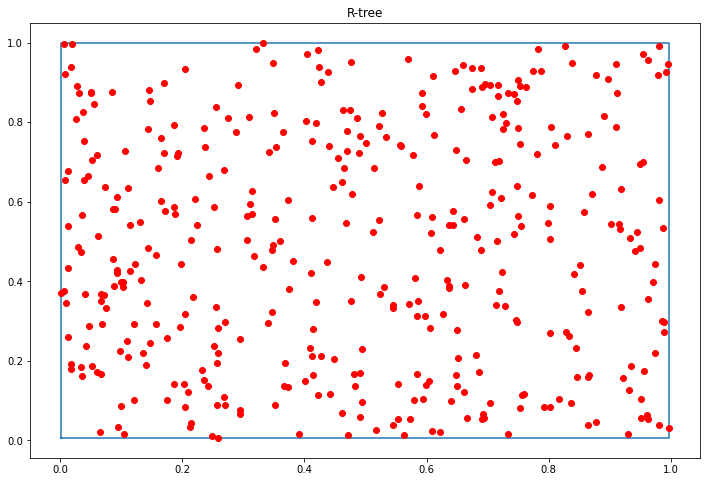

In [73]:
R1.imprime()

In [74]:
R1.subdivide()

Numero de nodos:  43
Area mínima de un nodo:  0.009772706994899018


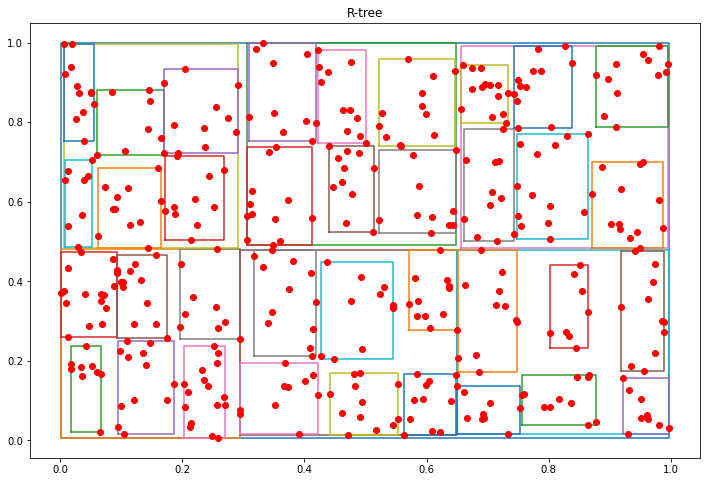

In [75]:
R1.imprime()

In [76]:
R1.subdivide()

Numero de nodos:  43
Area mínima de un nodo:  0.009772706994899018


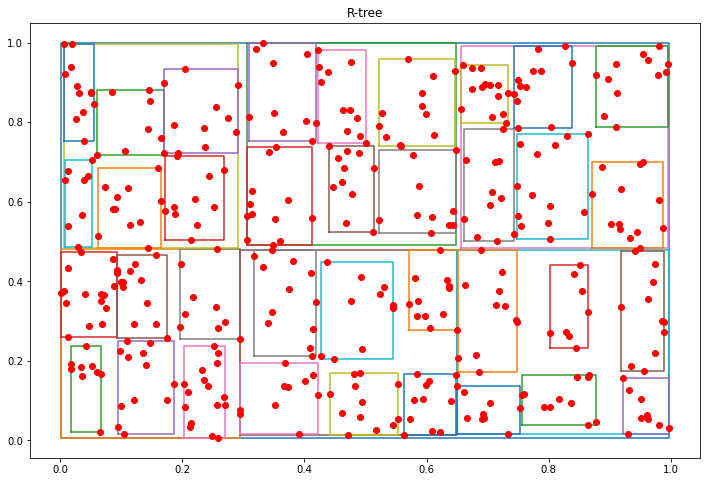

In [77]:
R1.imprime()

In [78]:
centers=[[.75,.75]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

In [79]:
puntos_random = puntos_random+ [Point(arr) for arr in X]

In [80]:
R1.sobre_puntos(20,points =puntos_random)

Numero de nodos:  1
Area mínima de un nodo:  5.72708923457538


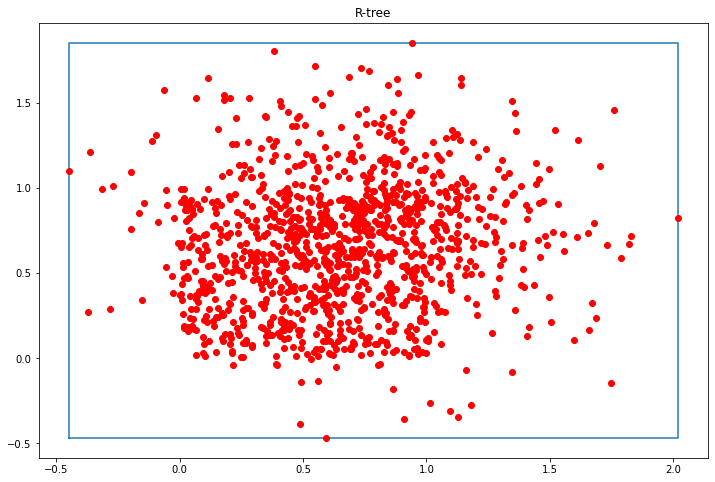

In [81]:
R1.imprime()

In [82]:
R1.subdivide()

Numero de nodos:  259
Area mínima de un nodo:  0.0


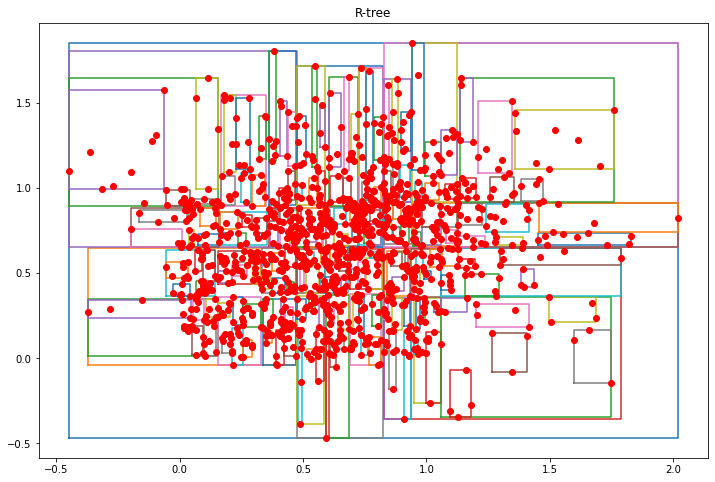

In [83]:
R1.imprime()

Numero de nodos:  259
Area mínima de un nodo:  0.0


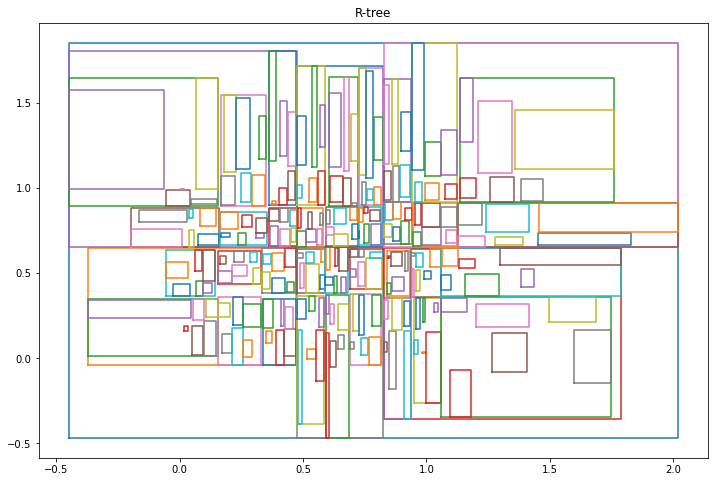

In [84]:
fig, axs = plt.subplots(figsize=(12, 8))
axs.set_title("R-tree")
c = todos(R1.root)
print ("Numero de nodos: " ,len(c))
areas = set()
for el in c:
    areas.add(el.ancho*el.altura)
print("Area mínima de un nodo: " ,min(areas))
for n in c:
    pol_x, pol_y = n.rectangulo.exterior.xy
    axs.plot(pol_x, pol_y)

plt.show()

In [2]:
G_1 = ox.graph_from_place("Cuernavaca, Morelos, Mexico", network_type="drive",)
G_2 = ox.graph_from_place("Jiutepec, Morelos, Mexico", network_type="drive",)
G_3 = ox.graph_from_place("Temixco, Morelos, Mexico", network_type="drive",)
G_4 = ox.graph_from_place("Xochitepec, Morelos, Mexico", network_type="drive",)
G_5 = ox.graph_from_place("Emiliano Zapata, Morelos, Mexico", network_type="drive",)

In [3]:
gdf = ox.geocode_to_gdf("Cuernavaca, Morelos, Mexico")
gdf.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-99.34201 18.92252, -99.33994 18.922...",19.02465,18.841911,-99.180544,-99.342012,258936152,relation,5605731,18.933132,-99.259958,"Cuernavaca, Morelos, Mexico",boundary,administrative,0.598514


In [4]:
xy = []
for G in [G_1, G_2, G_3, G_4, G_5 ]:
    xy= xy +[(data['x'], data['y']) for node, data in G.nodes(data=True)] + []


In [5]:
len(xy)

34617

In [6]:
 len([(data['x'], data['y']) for node, data in G_1.nodes(data=True)] + [])

12480

In [7]:
x, y = list(zip(*xy))

In [8]:
gdf_nodos = gpd.GeoDataFrame(data={'x':x, 'y':y})
gdf_nodos.crs = gdf.crs
gdf_nodos.name = 'nodes'
gdf_nodos['geometry'] = gdf_nodos.apply(lambda row: Point((row['x'], row['y'])), axis=1)

/home/miguel/anaconda3/envs/geoinformatica/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  


In [9]:
gdf_nodos.head()

,x,y,geometry
0,-99.213584,18.980180,POINT (-99.21358 18.98018)
1,-99.222702,18.964102,POINT (-99.22270 18.96410)
2,-99.217290,18.963633,POINT (-99.21729 18.96363)
3,-99.215480,18.964791,POINT (-99.21548 18.96479)
4,-99.213125,18.961792,POINT (-99.21313 18.96179)


<AxesSubplot:>

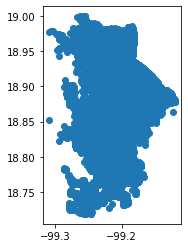

In [10]:
gdf_nodos.plot()

<AxesSubplot:>

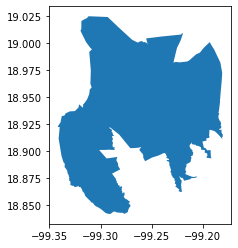

In [11]:
gdf.plot()

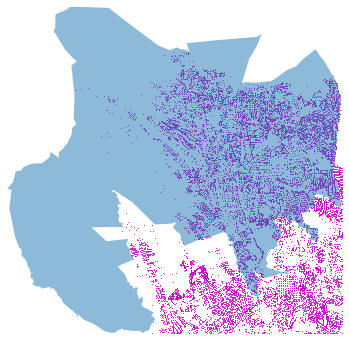

In [12]:
o_val, s_val, e_val, n_val = gdf.unary_union.bounds
fig, ax = plt.subplots(figsize=(6,6))

x_pol, y_pol = gdf['geometry'][0].exterior.xy
ax.fill (x_pol, y_pol, alpha=0.5)
ax.scatter(x=gdf_nodos['x'], y=gdf_nodos['y'], s=1, c='m', linewidth=0, zorder=1)

ax.set_xlim(o_val, e_val)
ax.set_ylim(s_val, n_val)




ax.axis('off')
plt.show()

In [13]:
sindex = gdf_nodos.sindex
possible_matches_index = list(sindex.intersection(gdf['geometry'][0].bounds))
possible_matches = gdf_nodos.iloc[possible_matches_index]
precise_matches = possible_matches[possible_matches.intersects(gdf['geometry'][0])]

In [14]:
points_within_geometry = precise_matches
points_outside_geometry = gdf_nodos[~gdf_nodos.isin(points_within_geometry)]

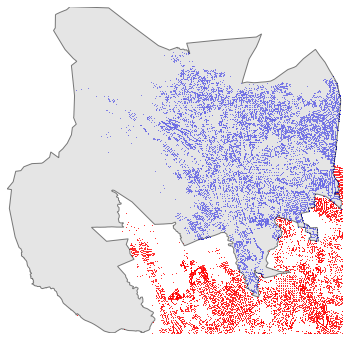

In [15]:
fig, ax = plt.subplots(figsize=(6,6))

patch = PolygonPatch(gdf['geometry'][0], fc='#cccccc', ec='k', alpha=0.5, zorder=3)
ax.add_patch(patch)

ax.scatter(x=points_outside_geometry['x'], y=points_outside_geometry['y'], s=1, c='r', linewidth=0, zorder=1)
ax.scatter(x=points_within_geometry['x'], y=points_within_geometry['y'], s=1, c='b', linewidth=0, zorder=2)
    
ax.set_xlim(o_val, e_val)
ax.set_ylim(s_val, n_val)
ax.axis('off')
plt.show()

In [16]:
geometry_cut = ox.utils_geo._quadrat_cut_geometry(gdf['geometry'][0], quadrat_width=0.01)

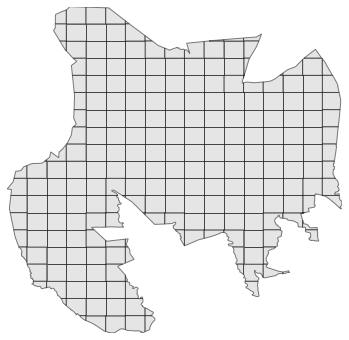

In [17]:
fig, ax = plt.subplots(figsize=(6,6))
for polygon in geometry_cut:
    patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
    ax.add_patch(patch)
    
ax.set_xlim(o_val, e_val)
ax.set_ylim(s_val, n_val)
ax.axis('off')
plt.show()



In [18]:
sindex = gdf_nodos.sindex

In [19]:
points_within_geometry = pd.DataFrame()
for poly in geometry_cut:
    # buffer by the <1 micron dist to account for any space lost in the quadrat cutting
    # otherwise may miss point(s) that lay directly on quadrat line
    poly = poly.buffer(1e-14).buffer(0)

    # find approximate matches with r-tree, then precise matches from those approximate ones
    possible_matches_index = list(sindex.intersection(poly.bounds))
    possible_matches = gdf_nodos.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(poly)]
    points_within_geometry = points_within_geometry.append(precise_matches)

In [20]:
points_within_geometry = points_within_geometry.drop_duplicates(subset=['x', 'y'])
points_outside_geometry = gdf_nodos[~gdf_nodos.isin(points_within_geometry)]

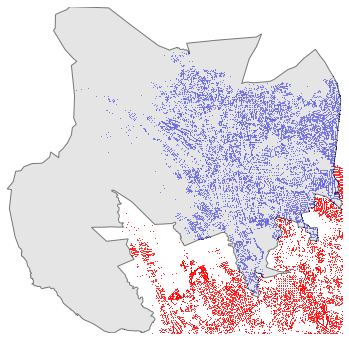

In [21]:
fig, ax = plt.subplots(figsize=(6,6))

patch = PolygonPatch(gdf['geometry'][0], fc='#cccccc', ec='k', alpha=0.5, zorder=3)
ax.add_patch(patch)

ax.scatter(x=points_outside_geometry['x'], y=points_outside_geometry['y'], s=1, c='r', linewidth=0, zorder=1)
ax.scatter(x=points_within_geometry['x'], y=points_within_geometry['y'], s=1, c='b', linewidth=0, zorder=2)
    
ax.set_xlim(o_val, e_val)
ax.set_ylim(s_val, n_val)
ax.axis('off')
plt.show()

In [23]:
gdf_nodos.x.quantile([.33, .666])

0.330   -99.232362
0.666   -99.196355
Name: x, dtype: float64

In [24]:
gdf_nodos.x.max()

-99.1201486

In [25]:
quan= np.quantile(gdf_nodos.x.values,.5)

In [26]:
quan

-99.215103

In [27]:
gdf_nodos.x.values[gdf_nodos.x.values < quan[0]]

IndexError: invalid index to scalar variable.

In [ ]:
bo= [ point for point in gdf_nodos.geometry if point.x < quan[0]  and point.y < ]

Las estructuras pensadas en el espacio tienen la ventaja de poder ser creadas primero y que los datos seran añadidos de forma gradual sin necesidad de cambiar la estructura. Las estructuras pensadas en los datos son mas eficientes para almacenar datos y para busquedas más rápidas, pero generalmente estan atadas a la estructura interna del almacenamiento de los datos, lo cual lleva a que se tiene que dar mantenimiento a estas cada cierto tiempo para mantener su eficiencia tan to en el almacenamiento como en la busqueda. 


Gracias al uso creciente de dispositivos georeferenciados la cantidad de datos disponibles a crecido de forma exponencial por lo cual es importante saber como almacenar y los distintos usos de los índices espaciales. 